# Algerian Forest Fires Dataset - Data Preprocessing & EDA
This notebook includes:
- Loading and cleaning the dataset
- Exploratory Data Analysis (EDA)
- Data transformation for model training


In [ ]:
# Install required libraries
!pip install seaborn

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the dataset
df=pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

In [8]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### Data Cleaning

In [9]:
# Check for missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [10]:
# Fix Region column based on index range
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df['Region']=df['Region'].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
# Remove missing values and reset index
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [14]:
df=df.drop(122,axis=0).reset_index(drop=True)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
# Strip whitespaces from column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [19]:
# Convert necessary columns to integer/float
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [20]:
# Convert non-'Classes' object columns to float
objects=[features for features in df.columns if df[features].dtype=='O']

for col in objects:
    if col!='Classes':
        df[col]=df[col].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [ ]:
# Save this cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

## 🔍 Exploratory Data Analysis (EDA)


In [22]:
# Drop day, month, year
df_copy=df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
# Categories in Classes
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [24]:
# Encoding of the categories in Classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [25]:
df_copy['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

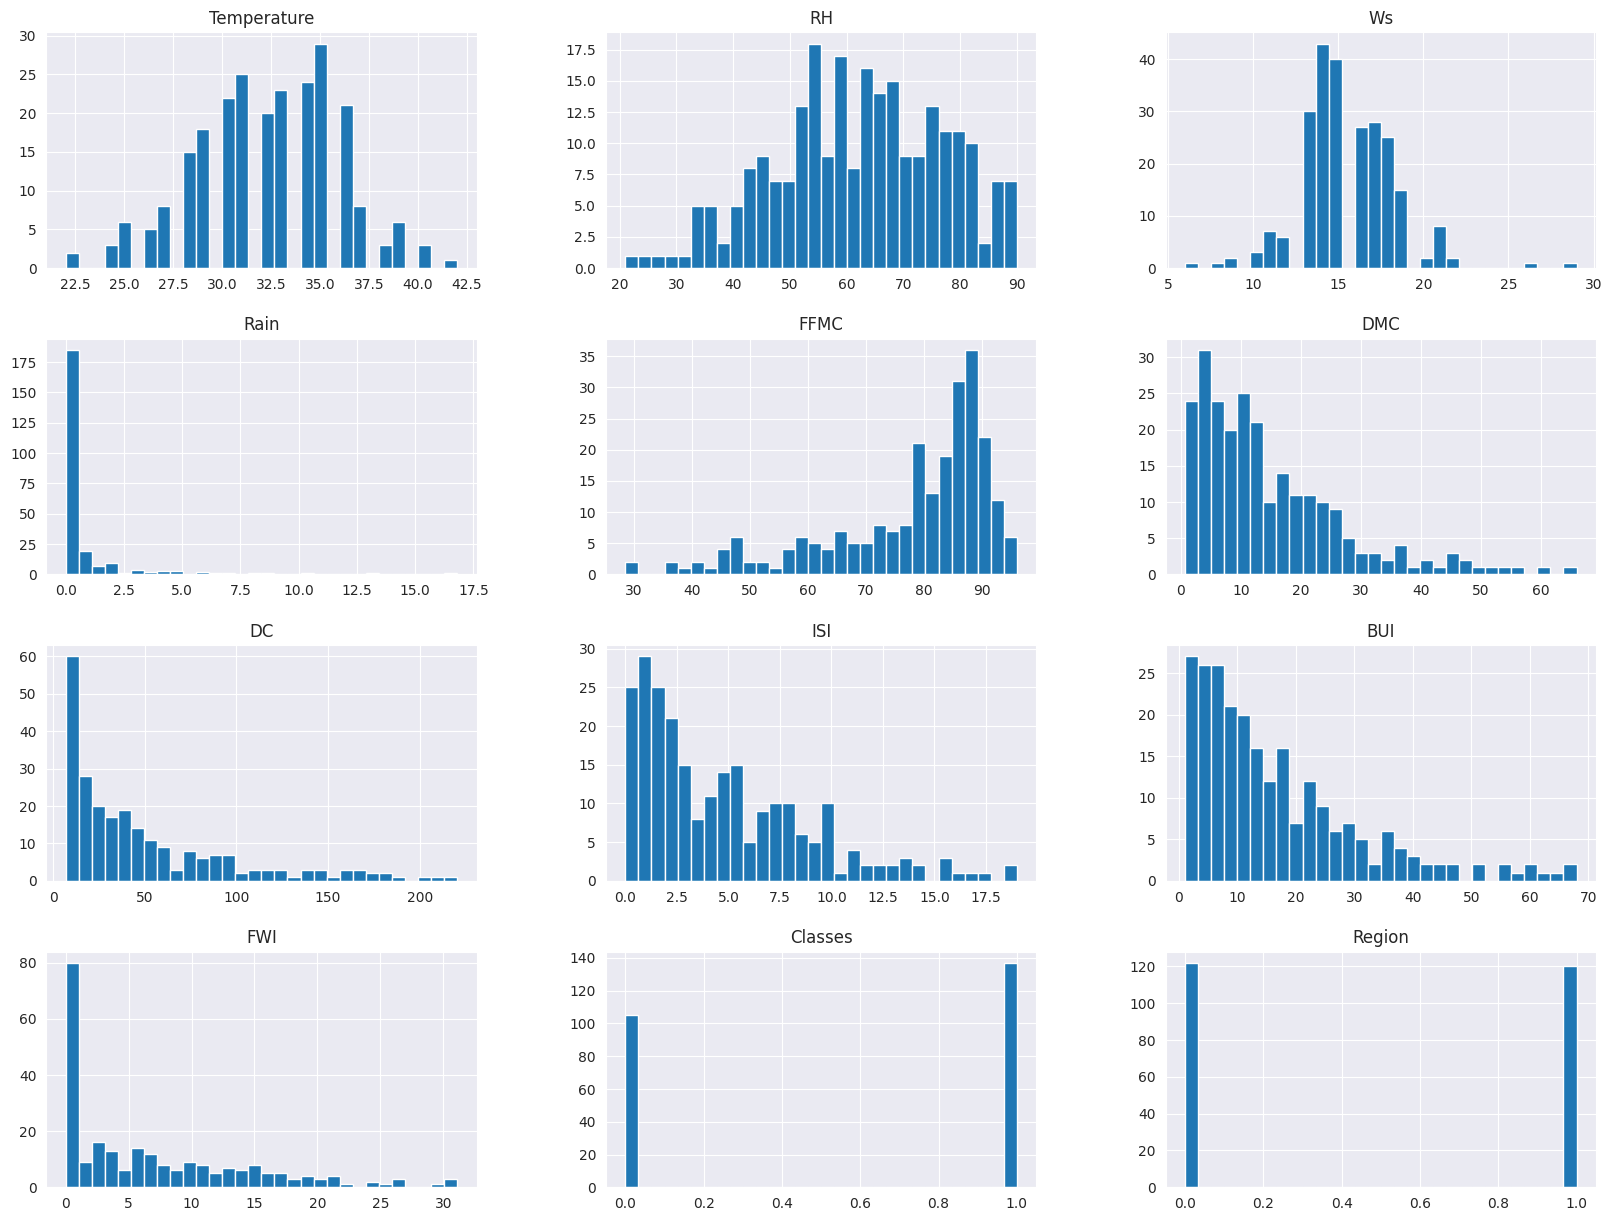

In [26]:
sns.set_style('darkgrid')
df_copy.hist(bins=30,figsize=(20,15))
plt.show()

In [27]:
# Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

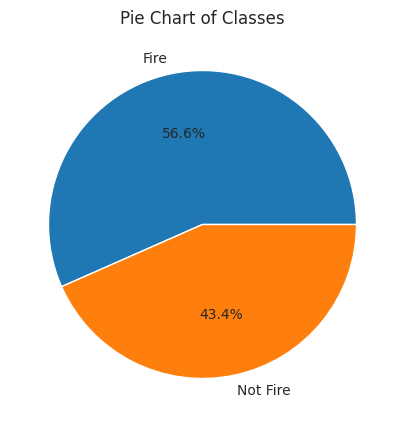

In [28]:
# Pie Chart
labels=['Fire','Not Fire']
plt.figure(figsize=(8,5))
plt.pie(percentage,labels=labels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [29]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.517203,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.430794,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.076262,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.380263,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.768069,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.583760,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,0.509202,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.733978,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.584762,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.718067,0.201695


<Axes: >

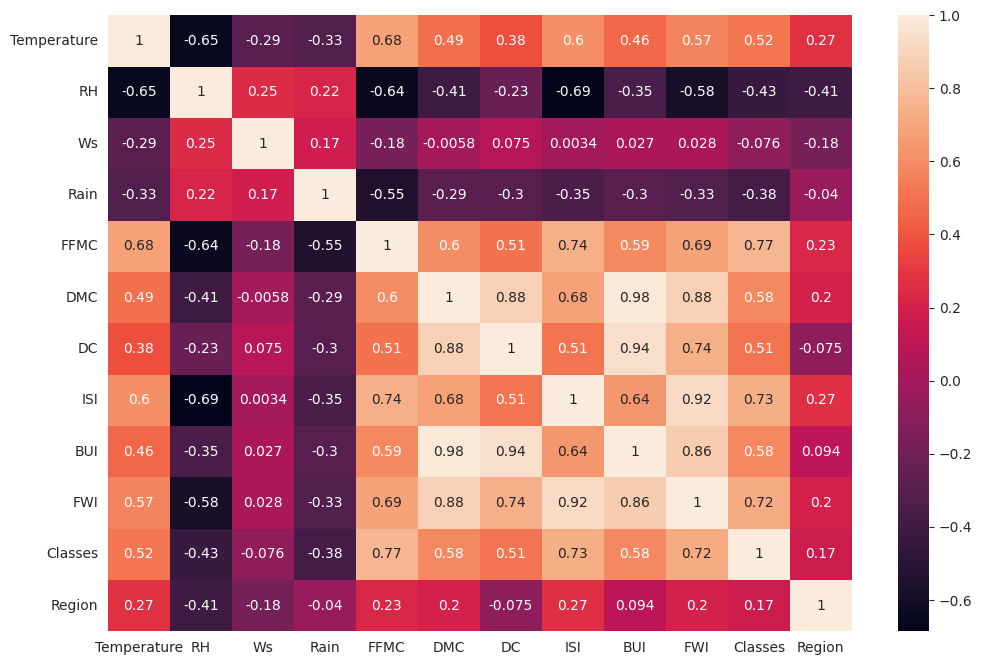

In [30]:
# Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(),annot=True)

<Axes: xlabel='FWI'>

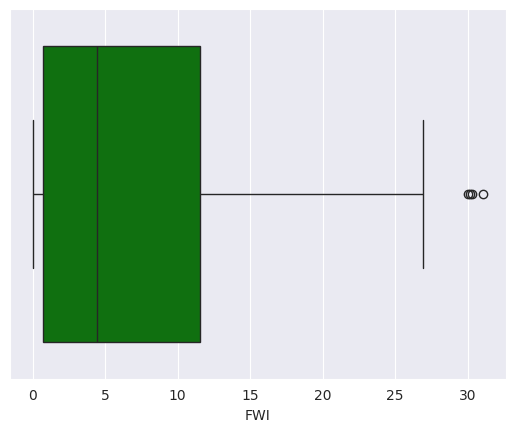

In [31]:
# Box Plot
sns.boxplot(x=df_copy['FWI'],color='g')

In [32]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
df['Classes'].value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

Text(0.5, 0, 'Months')

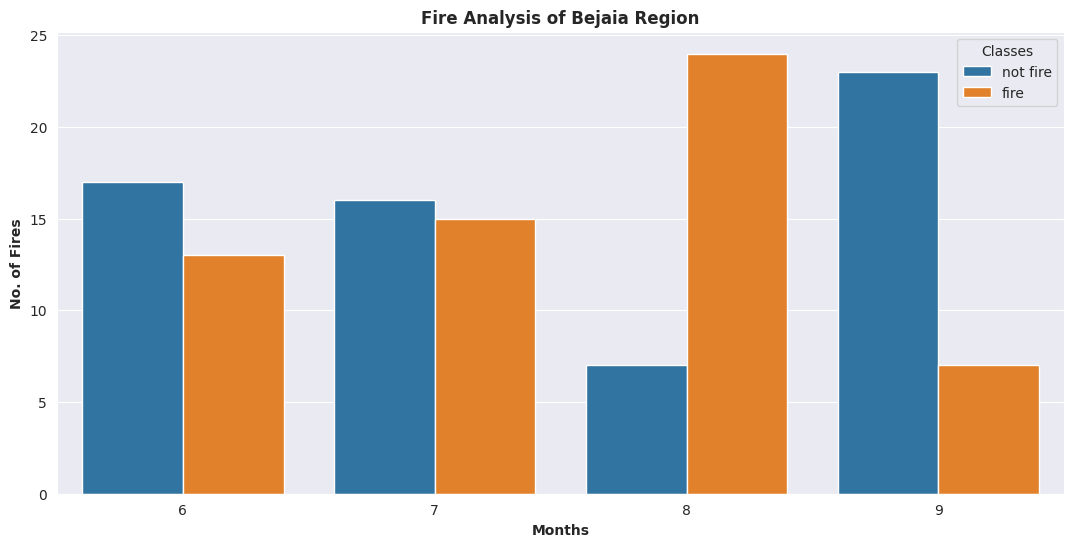

In [33]:
# Monthly Fire Analysis
df_temp1=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('darkgrid')
sns.countplot(x='month',hue='Classes',data=df_temp1)
plt.title('Fire Analysis of Bejaia Region',weight='bold')
plt.ylabel('No. of Fires',weight='bold')
plt.xlabel('Months',weight='bold')

Text(0.5, 0, 'Months')

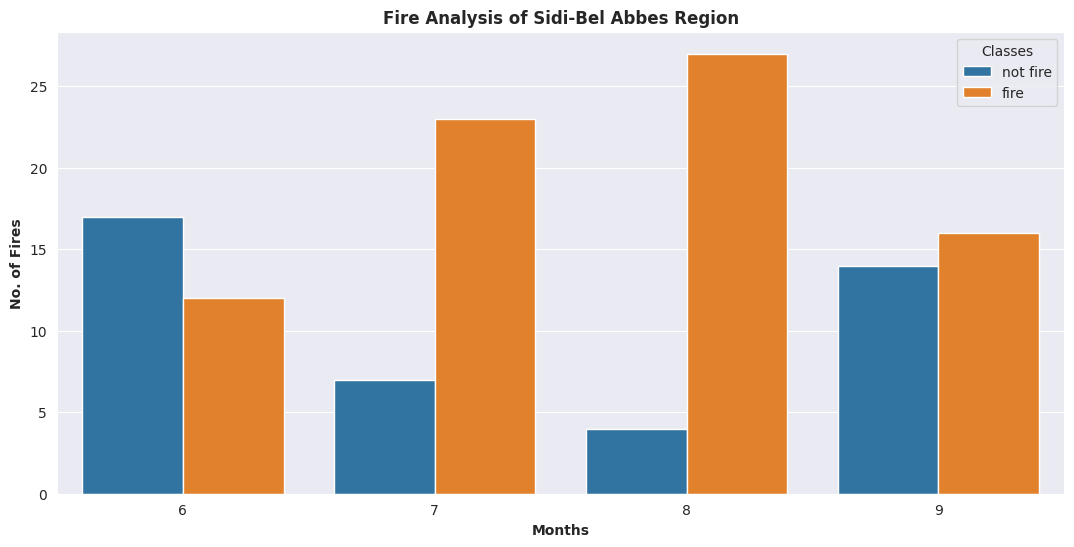

In [34]:
# Monthly Fire Analysis
df_temp1=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('darkgrid')
sns.countplot(x='month',hue='Classes',data=df_temp1)
plt.title('Fire Analysis of Sidi-Bel Abbes Region',weight='bold')
plt.ylabel('No. of Fires',weight='bold')
plt.xlabel('Months',weight='bold')